I am a huge Fan of the food system dashboard(https://www.foodsystemsdashboard.org/). But I missed one function: I wanted to plot the data of multiple countries (aggregated by sum or mean). The output irritated me somewhat. I post the reasons for my irritation to contribute to the ongoing development of the dashboard, and because I was told, publishing something interesting has a very positive impact on my employability. We'll see about that;)

To start with, I quite randomly picked one of the datasets, the dashboard provides: "Fertilizer consumption (kg/ha of arable land)

In [27]:
#!pip install pandas
#!pip install numpy
#!pip install matplotlib
#!pip install plotly

In [28]:
import numpy as np
import pandas as pd
import matplotlib as plt
import plotly.express as px
import plotly.graph_objects as go

In [29]:
fertilizer_consumption = pd.read_csv(r"C:\Users\morit\Desktop\Zwischenspeicher\Python_testspace\FSStats\fertilizer-consumption.csv")

#Group fertilizer_consumption anhand von Jahr, und Mittelwert der Werte
df_fertilizer_consumption_formean = fertilizer_consumption.copy()

def custom_aggsum(x):
        return x.dropna().sum()

aggregations = {
    'Value': custom_aggsum,
}

df_fertilizer_consumption_mean = df_fertilizer_consumption_formean.groupby('End Year').agg(aggregations).reset_index()
df_linegraph_fertilizer_mean = df_fertilizer_consumption_mean.copy()

fig = px.line (df_linegraph_fertilizer_mean, x="End Year",y="Value")
fig.show()

This is very strange, I thought. Why would world fertilizer consumption has peaked so heavely in 2019? Did I miss that peak phosphor was alread reached?
Well, I did not beliefe so and decided to plot the same data, with seperate lines for each country, to figure out, which countries are responsible for the heavy peak. 

In [32]:
df_linegraph_fertilizer = fertilizer_consumption.copy()

fig = px.line (df_linegraph_fertilizer, x="End Year",y="Value",color="Region Name")
fig.show()

The plotted graph does not leave much room for interpretation. The Faroe Islands have, right after becoming independet from denmark, needed to ramp up their agricultural production. But did they really used more fertilizer (228'878.08 kilo per acre arable land) in four years then any other nation has in 60? Of course not!
The food system dashboard references the world bank as the origin of the data. Going There(https://data.worldbank.org/indicator/AG.CON.FERT.ZS?end=2021&start=1961&view=chart&year=2021), i encountered another suprise. The world bank does offer the aggregated plot I wanted, but the Faroe peak I encountered does not appear on the plot. 

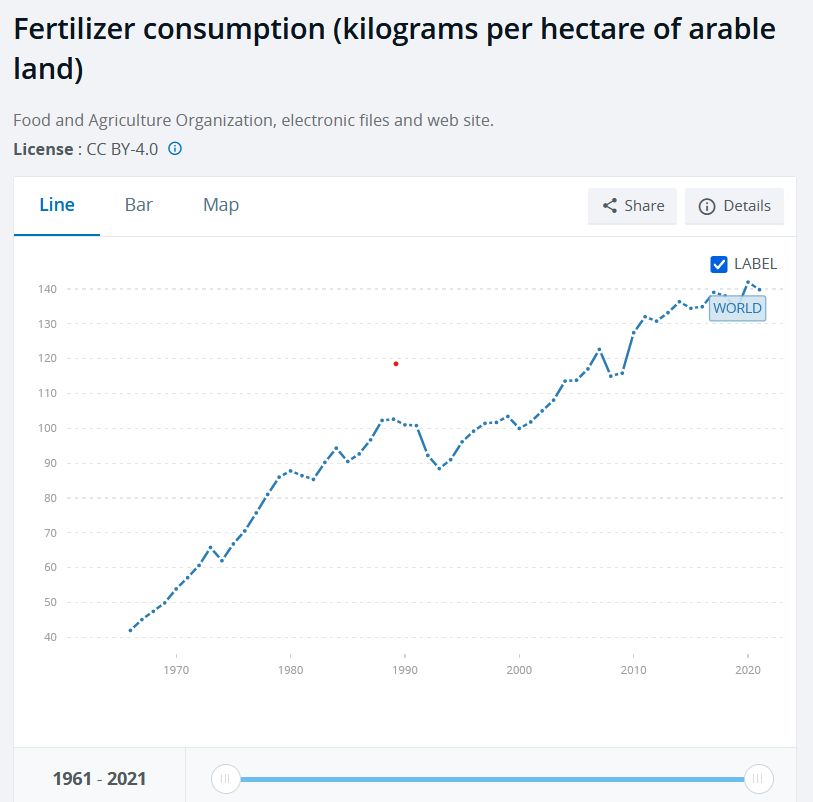

My first thought was, that the food system dashboard might have made a mistake with manipulating the world bank data. So I downloaded the world bank data and reproduced the plot they show on their website. This is the suprising result: 


In [33]:
#Load Dataset WorldBank
fertilizer_consumption_WB = pd.read_csv(r"C:\Users\morit\Desktop\Zwischenspeicher\Python_testspace\FSStats\fertilizer-consumption-WB.csv")

# Drop years in beginning and end of df, that contain no data
fertilizer_consumption_WB = fertilizer_consumption_WB.drop(columns=["1960", "2022", "2023"])

# List of identifier columns to retain in the long format
id_vars_columns = ["Country Name", "Country Code", "Indicator Name", "Indicator Code"]  # replace with your actual column names

# Convert from wide to long format
df_fertilizer_consumption_WB_long = pd.melt(
    fertilizer_consumption_WB, 
    id_vars=id_vars_columns, 
    var_name="Year", 
    value_name="Value"
)

 #Group fertilizer_consumption anhand von Jahr, und Mittelwert der Werte
df_fertilizer_consumption_WBformean = df_fertilizer_consumption_WB_long.copy()


def custom_aggsum(x):
        return x.dropna().sum()
    
aggregations = {
    'Value': custom_aggsum,

}

df_fertilizer_consumption_WBmean = df_fertilizer_consumption_WBformean.groupby('Year').agg(aggregations).reset_index()
df_linegraph_fertilizer_WBmean = df_fertilizer_consumption_WBmean.copy()

fig = px.line (df_linegraph_fertilizer_WBmean, x="Year",y="Value")
fig.show()

The World Bank Data has the very same Peak as does the FAO Data! This means, that the Data is the very same, but the world bank has for the production of their plot done some data manipulations. The world food system dashboard perhaps did not read the world bank metadata correctly. Well..., no! The world bank does not report their datamanipulations in detail. But what they do report, here comes the third suprise, is that the data origins at the FAO "Source: Food and Agriculture Organization, electronic files and web site". This means regarding the FAO the data source is the world bank and regarding the world bank, the data source is the FAO. I tried to find the dataset at FAO elswhere then in the Food System Dashboard, but was not successfull so far. 

To finalize the excercise neverthless, I tried to figure out how the world bank manipulated the data. Regarding the metadata, they have calculated a "weighted average". I tried various methods to resemble this, but the output never quite matched the world bank plot. An clasic idea brought the solution: What if the world bank had treated NANs (countries which have not reported data in some years) differently then I had?

I had excluded NANs in the calculation of the means. Replacing all NANs with "0" makes the plot match the World Bank plot. Ah, of course outliers (the Faroer peak as well as the smaller Singapore hill) were excluded. 

Below I ploted both aggregation methods. the read line displays the data wit NANs replaced by 0, the blue line displays the data with NANs excluded. The difference is considerable, when NANs are exluded. Continous growth of fortilizer use is not as clear as displayed on the world bank plot. 

In [34]:
 #Group fertilizer_consumption anhand von Jahr, und Mittelwert der Werte
df_fertilizerconsumption_WB_excludedNAN = df_fertilizer_consumption_WB_long.copy()
df_fertilizerconsumption_WB_excludedNAN = df_fertilizerconsumption_WB_excludedNAN[df_fertilizerconsumption_WB_excludedNAN["Country Name"] != "Faroe Islands"]
df_fertilizerconsumption_WB_excludedNAN = df_fertilizerconsumption_WB_excludedNAN[df_fertilizerconsumption_WB_excludedNAN["Country Name"] != "Singapore"]

df_fertilizerconsumption_WB_replacedNAN = df_fertilizer_consumption_WB_long.copy()
df_fertilizerconsumption_WB_replacedNAN = df_fertilizerconsumption_WB_replacedNAN.fillna(0)
df_fertilizerconsumption_WB_replacedNAN = df_fertilizerconsumption_WB_replacedNAN[df_fertilizerconsumption_WB_replacedNAN["Country Name"] != "Faroe Islands"]
df_fertilizerconsumption_WB_replacedNAN = df_fertilizerconsumption_WB_replacedNAN[df_fertilizerconsumption_WB_replacedNAN["Country Name"] != "Singapore"]

def custom_aggmean(x):
    mean_val = x.dropna().mean()  # calculate the mean after dropping NaN values
    return mean_val  # directly return the mean value

aggregations = {
    'Value': custom_aggmean,
}
df_fertilizerconsumption_WB_excludedNAN_mean = df_fertilizerconsumption_WB_excludedNAN.groupby('Year').agg(aggregations).reset_index()
df_fertilizerconsumption_WB_replacedNAN_mean = df_fertilizerconsumption_WB_replacedNAN.groupby('Year').agg(aggregations).reset_index()

fig = go.Figure() 
fig.add_trace(go.Scatter(x=df_fertilizerconsumption_WB_excludedNAN_mean["Year"], y=df_fertilizerconsumption_WB_excludedNAN_mean["Value"], mode="lines", name ="fertilizer consumption, NANs excluded"))
fig.add_trace(go.Scatter(x=df_fertilizerconsumption_WB_replacedNAN_mean["Year"], y=df_fertilizerconsumption_WB_replacedNAN_mean["Value"], mode="lines", name ="fertilizer consumption, NANs replaced, the world bank plot"))
fig.show()

In conclusion:
1) The world Bank might have quite correctly dropped unrealistic outliers. And Data might in this case accurately be desplayed with the replaing NANs by 0 method. This is if it can be assumed, that countries where no data was available are countries which did not use chemical fertilizers. This is quite quite an assumption though, one which clearly should be included in the description of the plot or the metadata files. 
2) Also, false data, like the Faroer peak, should be highlighted in the description of a dataset which is likely to be used in many dashboards and reports. Or at least, such peaks should not be hidden in displayed data aggregations. 
3) Last but not least, users need to be enabled to deal with outliers. Circularly referencing data source instead of referencing the real source of the data, is... misleading. 

I am still very much a fan of the Food System Dashboard and the World Bank Data Catalogue!